<a href="https://www.kaggle.com/mu202199/safe-driver-prediction" target="_blank">Safe Driver Prediction</a> dataset are from Kaggle. 

<ul>
    <li><a href="https://www.kaggle.com/aashishjhamtani/automobile-insurance" target="_blank">Auto Insurance</a></li>
    <li><a href="https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data" target="_blank">Porto Seguro’s Safe Driver Prediction</a></li>
    <li><a href="https://www.kaggle.com/c/allstate-claims-severity/data" _target="_blank">Allstate Claims Severity</a></li>
</ul>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file = "./data/IT_3.xlsx"
data = pd.read_excel(file)
data.head()

ID  target Gender  EngineHP  credit_history  Years_Experience  \
0   1       1      F       522             656                 1   
1   2       1      F       691             704                16   
2   3       1      M       133             691                15   
3   4       1      M       146             720                 9   
4   5       1      M       128             771                33   

   annual_claims Marital_Status Vehical_type  Miles_driven_annually  \
0              0        Married          Car                14749.0   
1              0        Married          Car                15389.0   
2              0        Married          Van                 9956.0   
3              0        Married          Van                77323.0   
4              1        Married          Van                14183.0   

   size_of_family Age_bucket EngineHP_bucket Years_Experience_bucket  \
0               5        <18            >350                      <3   
1               6      28-34            >350                   15-30   
2               3        >40          90-160                   15-30   
3               3      18-27          90-160                   9-14'   
4               4        >40          90-160                     >30   

  Miles_driven_annually_bucket credit_history_bucket State  
0                         <15k                  Fair    IL  
1                      15k-25k                  Good    NJ  
2                         <15k                  Good    CT  
3                         >25k                  Good    CT  
4                         <15k             Very Good    WY

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 17 columns):
ID                              30240 non-null int64
target                          30240 non-null int64
Gender                          30240 non-null object
EngineHP                        30240 non-null int64
credit_history                  30240 non-null int64
Years_Experience                30240 non-null int64
annual_claims                   30240 non-null int64
Marital_Status                  30240 non-null object
Vehical_type                    30240 non-null object
Miles_driven_annually           30232 non-null float64
size_of_family                  30240 non-null int64
Age_bucket                      30240 non-null object
EngineHP_bucket                 30240 non-null object
Years_Experience_bucket         30240 non-null object
Miles_driven_annually_bucket    30232 non-null object
credit_history_bucket           30240 non-null object
State                           3

In [18]:
# creating a dict file  
# gender = {'F': 1,'M': 2} 
# data.Gender = [gender[item] for item in data.Gender]
def gender_to_numeric(x):
    if x == 'F':
        return 0
    if x == 'M':
        return 1
    return x
data['Gender'] = data['Gender'].apply(gender_to_numeric)

def marital_status_to_numeric(x):
    if x == 'Married':
        return 0
    if x == 'Single':
        return 1
    return x
data['Marital_Status'] = data['Marital_Status'].apply(marital_status_to_numeric)

def vehical_type_to_numeric(x):
    if x == 'Car':
        return 0
    if x == 'Truck':
        return 1
    if x == 'Utility':
        return 2
    if x == 'Van':
        return 3
    return x
data['Vehical_type'] = data['Vehical_type'].apply(vehical_type_to_numeric)

mapping_dict = {
    "credit_history_bucket": {
        "Very Poor": 0,
        "Poor": 1,
        "Fair": 2,
        "Good": 3,
        "Very Good": 4,
        "Exceptional": 5
    },
    "Age_bucket":{
        "<18": 0,
        "18-27": 1,
        "28-34": 2,
        "35-40": 3,
        ">40": 4
    },
    "EngineHP_bucket":{
        "<90": 0,
        "90-160": 1,
        "161-350": 2,
        ">350": 3
    },
    'Miles_driven_annually_bucket': {
        '<15k': 0,
        '15k-25k': 1,
        '>25k': 2,
        'NA': 3
    },
    "Years_Experience_bucket":{
        "<3": 0,
        "3-8'": 1,
        "9-14'": 2,
        "15-30": 3,
        ">30": 4
    }
}

data = data.replace(mapping_dict)
data.drop('State', axis=1, inplace=True)
data.head()

ID  target  Gender  EngineHP  credit_history  Years_Experience  \
0   1       1       0       522             656                 1   
1   2       1       0       691             704                16   
2   3       1       1       133             691                15   
3   4       1       1       146             720                 9   
4   5       1       1       128             771                33   

   annual_claims  Marital_Status  Vehical_type  Miles_driven_annually  \
0              0               0             0                14749.0   
1              0               0             0                15389.0   
2              0               0             3                 9956.0   
3              0               0             3                77323.0   
4              1               0             3                14183.0   

   size_of_family  Age_bucket  EngineHP_bucket  Years_Experience_bucket  \
0               5           0                3                        0   
1               6           2                3                        3   
2               3           4                1                        3   
3               3           1                1                        2   
4               4           4                1                        4   

   Miles_driven_annually_bucket  credit_history_bucket  
0                           0.0                      2  
1                           1.0                      3  
2                           0.0                      3  
3                           2.0                      3  
4                           0.0                      4

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 16 columns):
ID                              30240 non-null int64
target                          30240 non-null int64
Gender                          30240 non-null int64
EngineHP                        30240 non-null int64
credit_history                  30240 non-null int64
Years_Experience                30240 non-null int64
annual_claims                   30240 non-null int64
Marital_Status                  30240 non-null int64
Vehical_type                    30240 non-null int64
Miles_driven_annually           30232 non-null float64
size_of_family                  30240 non-null int64
Age_bucket                      30240 non-null int64
EngineHP_bucket                 30240 non-null int64
Years_Experience_bucket         30240 non-null int64
Miles_driven_annually_bucket    30232 non-null float64
credit_history_bucket           30240 non-null int64
dtypes: float64(2), int64(14)
memory us

In [20]:
data.describe()

ID       target        Gender      EngineHP  credit_history  \
count  30240.000000  30240.00000  30240.000000  30240.000000    30240.000000   
mean   15120.500000      0.70754      0.540972    196.604266      685.769775   
std     8729.680407      0.45490      0.498327    132.346961      102.454307   
min        1.000000      0.00000      0.000000     80.000000      300.000000   
25%     7560.750000      0.00000      0.000000    111.000000      668.000000   
50%    15120.500000      1.00000      1.000000    141.000000      705.000000   
75%    22680.250000      1.00000      1.000000    238.000000      753.000000   
max    30240.000000      1.00000      1.000000   1005.000000      850.000000   

       Years_Experience  annual_claims  Marital_Status  Vehical_type  \
count      30240.000000   30240.000000    30240.000000  30240.000000   
mean          13.255721       1.138459        0.344577      1.136607   
std            9.890246       1.082913        0.475238      1.127429   
min            1.000000       0.000000        0.000000      0.000000   
25%            5.000000       0.000000        0.000000      0.000000   
50%           10.000000       1.000000        0.000000      1.000000   
75%           20.000000       2.000000        1.000000      2.000000   
max           40.000000       4.000000        1.000000      3.000000   

       Miles_driven_annually  size_of_family    Age_bucket  EngineHP_bucket  \
count           30232.000000    30240.000000  30240.000000     30240.000000   
mean            17422.938939        4.521296      2.723776         1.416501   
std             17483.782840        2.286531      1.323469         0.837961   
min              5000.000000        1.000000      0.000000         0.000000   
25%              9668.500000        3.000000      1.000000         1.000000   
50%             12280.000000        5.000000      3.000000         1.000000   
75%             14697.250000        7.000000      4.000000         2.000000   
max             99943.000000        8.000000      4.000000         3.000000   

       Years_Experience_bucket  Miles_driven_annually_bucket  \
count             30240.000000                  30232.000000   
mean                  1.934325                      0.729889   
std                   1.174759                      0.905700   
min                   0.000000                      0.000000   
25%                   1.000000                      0.000000   
50%                   2.000000                      0.000000   
75%                   3.000000                      2.000000   
max                   4.000000                      2.000000   

       credit_history_bucket  
count           30240.000000  
mean                2.871230  
std                 1.241907  
min                 0.000000  
25%                 2.000000  
50%                 3.000000  
75%                 4.000000  
max                 5.000000

#### Check for null values

In [21]:
#Verify if there is any NaN in dataset
data.isna().any()

ID                              False
target                          False
Gender                          False
EngineHP                        False
credit_history                  False
Years_Experience                False
annual_claims                   False
Marital_Status                  False
Vehical_type                    False
Miles_driven_annually            True
size_of_family                  False
Age_bucket                      False
EngineHP_bucket                 False
Years_Experience_bucket         False
Miles_driven_annually_bucket     True
credit_history_bucket           False
dtype: bool

#### Replace null with mean

In [22]:
data=data.fillna(data.mean())

In [23]:
data.isna().any()

ID                              False
target                          False
Gender                          False
EngineHP                        False
credit_history                  False
Years_Experience                False
annual_claims                   False
Marital_Status                  False
Vehical_type                    False
Miles_driven_annually           False
size_of_family                  False
Age_bucket                      False
EngineHP_bucket                 False
Years_Experience_bucket         False
Miles_driven_annually_bucket    False
credit_history_bucket           False
dtype: bool

#### Breakdown of the target

target
0     8844
1    21396
Name: target, dtype: int64

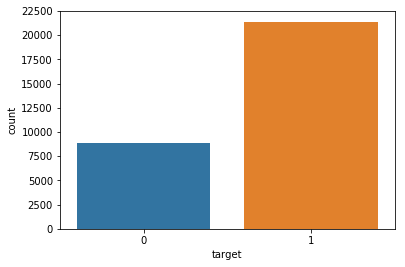

In [24]:
sns.countplot(data.target)
data.groupby('target')['target'].count()

In [25]:
col_driver_study = ['Gender', 'credit_history', 'Years_Experience', 'Marital_Status', 'size_of_family', 'Age_bucket']

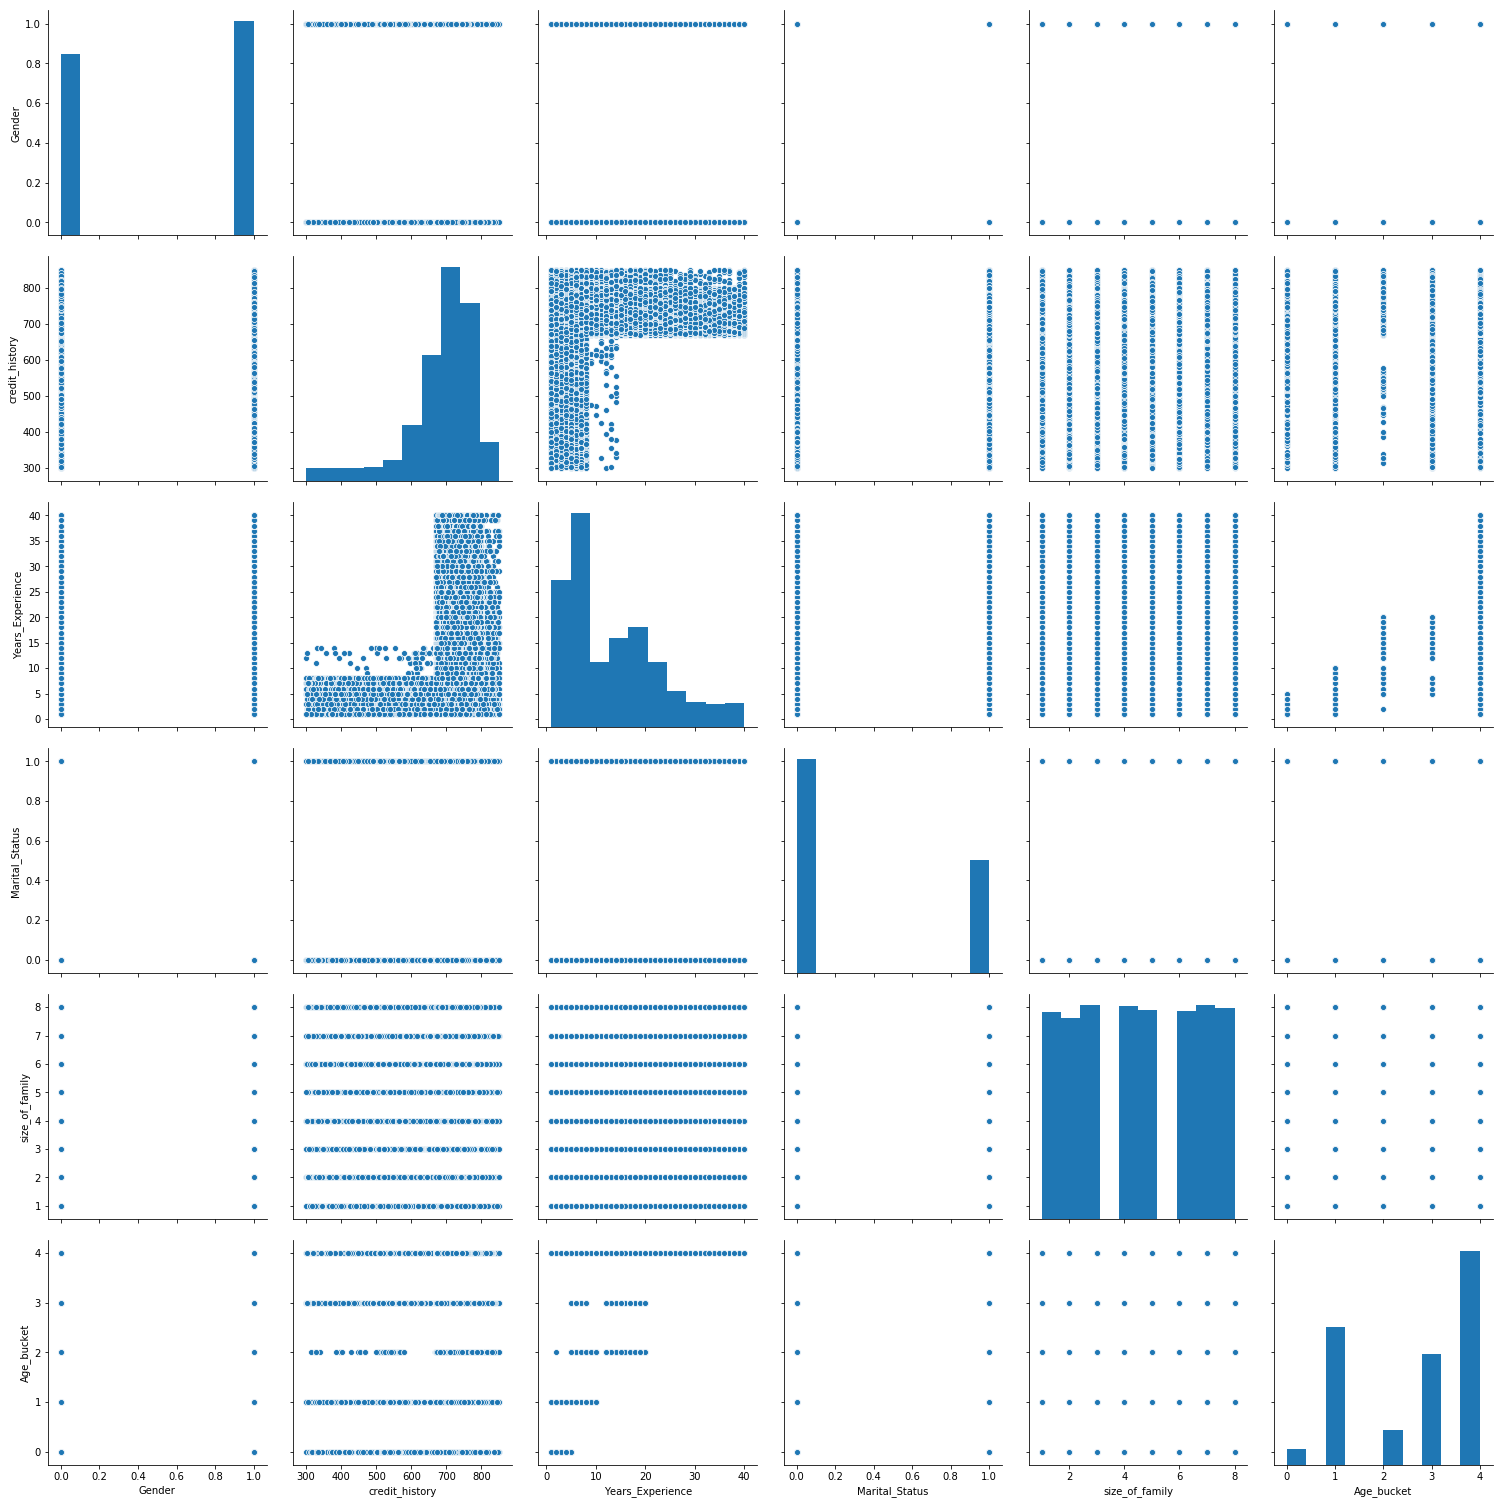

In [26]:
sns.pairplot(data[col_driver_study], height = 3.5)
plt.show()

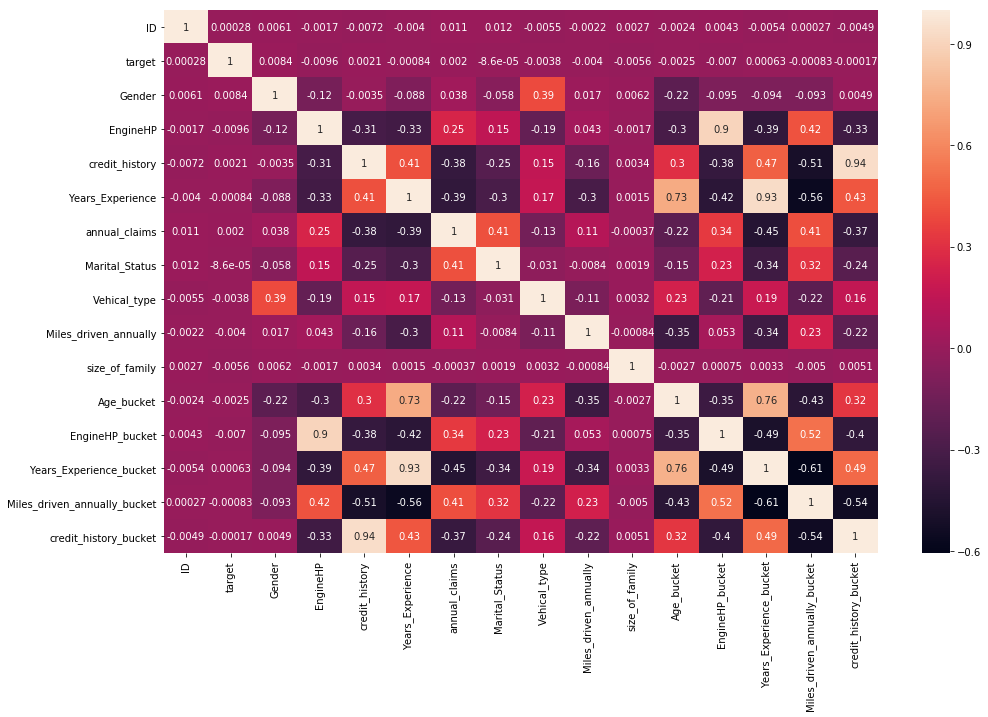

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [28]:
data.corr()

ID    target    Gender  EngineHP  \
ID                            1.000000  0.000279  0.006053 -0.001689   
target                        0.000279  1.000000  0.008368 -0.009582   
Gender                        0.006053  0.008368  1.000000 -0.122423   
EngineHP                     -0.001689 -0.009582 -0.122423  1.000000   
credit_history               -0.007200  0.002122 -0.003450 -0.307950   
Years_Experience             -0.003985 -0.000841 -0.087599 -0.329912   
annual_claims                 0.010630  0.002050  0.037562  0.251269   
Marital_Status                0.011692 -0.000086 -0.058359  0.152036   
Vehical_type                 -0.005482 -0.003794  0.392324 -0.189555   
Miles_driven_annually        -0.002166 -0.003993  0.017416  0.042684   
size_of_family                0.002736 -0.005585  0.006243 -0.001674   
Age_bucket                   -0.002410 -0.002522 -0.221341 -0.300866   
EngineHP_bucket               0.004297 -0.006980 -0.095077  0.903045   
Years_Experience_bucket      -0.005357  0.000630 -0.093865 -0.394377   
Miles_driven_annually_bucket  0.000270 -0.000829 -0.093305  0.418612   
credit_history_bucket        -0.004933 -0.000166  0.004892 -0.332520   

                              credit_history  Years_Experience  annual_claims  \
ID                                 -0.007200         -0.003985       0.010630   
target                              0.002122         -0.000841       0.002050   
Gender                             -0.003450         -0.087599       0.037562   
EngineHP                           -0.307950         -0.329912       0.251269   
credit_history                      1.000000          0.410206      -0.377410   
Years_Experience                    0.410206          1.000000      -0.393653   
annual_claims                      -0.377410         -0.393653       1.000000   
Marital_Status                     -0.246310         -0.298126       0.414610   
Vehical_type                        0.152535          0.170426      -0.134862   
Miles_driven_annually              -0.162540         -0.302104       0.109341   
size_of_family                      0.003352          0.001519      -0.000370   
Age_bucket                          0.298160          0.734115      -0.221384   
EngineHP_bucket                    -0.376304         -0.418953       0.337686   
Years_Experience_bucket             0.466065          0.933805      -0.449299   
Miles_driven_annually_bucket       -0.505078         -0.561274       0.408012   
credit_history_bucket               0.941672          0.434057      -0.374445   

                              Marital_Status  Vehical_type  \
ID                                  0.011692     -0.005482   
target                             -0.000086     -0.003794   
Gender                             -0.058359      0.392324   
EngineHP                            0.152036     -0.189555   
credit_history                     -0.246310      0.152535   
Years_Experience                   -0.298126      0.170426   
annual_claims                       0.414610     -0.134862   
Marital_Status                      1.000000     -0.031135   
Vehical_type                       -0.031135      1.000000   
Miles_driven_annually              -0.008384     -0.106940   
size_of_family                      0.001920      0.003214   
Age_bucket                         -0.145314      0.228636   
EngineHP_bucket                     0.227872     -0.207805   
Years_Experience_bucket            -0.339156      0.185250   
Miles_driven_annually_bucket        0.317705     -0.219029   
credit_history_bucket              -0.241228      0.164432   

                              Miles_driven_annually  size_of_family  \
ID                                        -0.002166        0.002736   
target                                    -0.003993       -0.005585   
Gender                                     0.017416        0.006243   
EngineHP                                   0.042684       -0.001674   
credit_history         

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 16 columns):
ID                              30240 non-null int64
target                          30240 non-null int64
Gender                          30240 non-null int64
EngineHP                        30240 non-null int64
credit_history                  30240 non-null int64
Years_Experience                30240 non-null int64
annual_claims                   30240 non-null int64
Marital_Status                  30240 non-null int64
Vehical_type                    30240 non-null int64
Miles_driven_annually           30240 non-null float64
size_of_family                  30240 non-null int64
Age_bucket                      30240 non-null int64
EngineHP_bucket                 30240 non-null int64
Years_Experience_bucket         30240 non-null int64
Miles_driven_annually_bucket    30240 non-null float64
credit_history_bucket           30240 non-null int64
dtypes: float64(2), int64(14)
memory us

#### Remove derived column, verified with Excel.

In [30]:
data.drop(['Miles_driven_annually_bucket','Years_Experience_bucket','EngineHP_bucket','credit_history_bucket'], axis=1, inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 12 columns):
ID                       30240 non-null int64
target                   30240 non-null int64
Gender                   30240 non-null int64
EngineHP                 30240 non-null int64
credit_history           30240 non-null int64
Years_Experience         30240 non-null int64
annual_claims            30240 non-null int64
Marital_Status           30240 non-null int64
Vehical_type             30240 non-null int64
Miles_driven_annually    30240 non-null float64
size_of_family           30240 non-null int64
Age_bucket               30240 non-null int64
dtypes: float64(1), int64(11)
memory usage: 2.8 MB


#### Split the data, 80% train, 20% test

In [32]:
from sklearn.model_selection import train_test_split

feature_col_names = ['ID', 'Gender', 'EngineHP', 'credit_history', 'Years_Experience', 'annual_claims', 'Marital_Status', 'Vehical_type', 'Miles_driven_annually', 'size_of_family', 'Age_bucket']
predicted_class_names = ['target']

X = data[feature_col_names].values     # predictor feature columns (8 X m)
y = data[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

Verify the Percentage is desired.

In [33]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data.index)) * 100))

80.00% in training set
20.00% in test set


In [34]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data.loc[data['target'] == 1]), (len(data.loc[data['target'] == 1])/len(data.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data.loc[data['target'] == 0]), (len(data.loc[data['target'] == 0])/len(data.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 21396 (70.75%)
Original False : 8844 (29.25%)

Training True  : 17122 (70.78%)
Training False : 7070 (29.22%)

Test True      : 4274 (70.67%)
Test False     : 1774 (29.33%)


## Training Initial Algorithm - Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance on Training Data

In [36]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7078



### Performance on Test Data


In [37]:
# predict values using the training data
nb_predict_test = nb_model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7067



#### Metrics

In [38]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

Confusion Matrix
[[4274    0]
 [1774    0]]

Classification Report
              precision    recall  f1-score   support

           1       0.71      1.00      0.83      4274
           0       0.00      0.00      0.00      1774

   micro avg       0.71      0.71      0.71      6048
   macro avg       0.35      0.50      0.41      6048
weighted avg       0.50      0.71      0.59      6048



C:\Users\dlam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dlam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dlam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

C:\Users\dlam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict Training Data

In [40]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9895


### Predict Test Data

In [41]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.6243


In [44]:
print(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

[[3485  789]
 [1483  291]]

Classification Report
              precision    recall  f1-score   support

           1       0.70      0.82      0.75      4274
           0       0.27      0.16      0.20      1774

   micro avg       0.62      0.62      0.62      6048
   macro avg       0.49      0.49      0.48      6048
weighted avg       0.57      0.62      0.59      6048



<img src="images/ConfusionMatrix.png"></img>

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy: 0.7067
[[4274    0]
 [1774    0]]

Classification Report
              precision    recall  f1-score   support

           1       0.71      1.00      0.83      4274
           0       0.00      0.00      0.00      1774

   micro avg       0.71      0.71      0.71      6048
   macro avg       0.35      0.50      0.41      6048
weighted avg       0.50      0.71      0.59      6048



C:\Users\dlam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dlam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dlam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
